# Projeto - NeoEvolution - Exploração de base de dados Kaggle.

Grupo 03:
- Alexsander Vieira
- Bruno Crestani
- Vitor Hugo Gomes
- Mariane Scheffer Nazaro

Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importando o csv 

In [4]:
df = pd.read_csv('../neo-evolution-project-group-3/songs_normalize.csv')

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


Descrição das colunas do DataFrame

duration_ms: Duration of the track in milliseconds
explicit: Explicit content
year: Release Year of the track
popularity: The higher the value the more popular the song is
danceability: A value of 0.0 is least danceable and 1.0 is most danceable
energy: Represents a perceptual measure of intensity and activity
key: The key the track is in
loudness: The overall loudness of a track in decibels (dB)
mode: The modality (major or minor) of a track
speechiness: Speechiness detects the presence of spoken words in a track
acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic
instrumentalness: Predicts whether a track contains no vocals
liveness: Detects the presence of an audience in the recording
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
tempo: The overall estimated tempo of a track in beats per minute (BPM)
genre: Genre of the track

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [15]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [6]:

df[df.duplicated(subset=['artist', 'song'], keep=False)]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
20,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,"rock, metal"
36,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.29200,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"
63,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.37600,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
85,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.36200,0.000004,0.1690,0.927,97.954,"pop, R&B"
90,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.31500,0.000009,0.0900,0.631,144.673,"pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,Cardi B,Bodak Yellow,223712,True,2018,72,0.926,0.703,11,-6.337,0,0.1030,0.06590,0.000000,0.2310,0.485,125.022,"hip hop, pop"
1861,Post Malone,Better Now,231266,True,2018,80,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,hip hop
1921,Travis Scott,SICKO MODE,312820,True,2018,81,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,"hip hop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [7]:
df_nao_dup=df.drop_duplicates(subset=['artist', 'song'], keep='first')
df_nao_dup

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [8]:
df_nao_dup['genre'].value_counts()

pop                                      411
hip hop, pop                             265
hip hop, pop, R&B                        234
pop, Dance/Electronic                    213
pop, R&B                                 170
hip hop                                  120
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
set()                                     22
latin                                     15
hip hop, Dance/Electronic                 15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
metal                                      9
hip hop, pop, rock                         9
country   

In [9]:
df_set_true = df_nao_dup[df_nao_dup['genre'] == 'set()']
df_clean = df_nao_dup.drop(df_nao_dup[df_nao_dup['genre'] == 'set()'].index, inplace=False)
df_clean

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [10]:
#Retirar os anos da base com amostras muito baixas
df_1998 = df_clean[df_clean['year'] == 1998]
df_clean1998 = df_clean.drop(df_clean[df_clean['year'] == 1998].index, inplace=False)
df_clean1998['year'].value_counts()

df_1999 = df_clean1998[df_clean1998['year'] == 1999]
df_clean1999 = df_clean1998.drop(df_clean1998[df_clean1998['year'] == 1999].index, inplace=False)
df_clean1999['year'].value_counts()

df_2020 = df_clean1999[df_clean1999['year'] == 2020]
df_clean2020 = df_clean1999.drop(df_clean1999[df_clean1999['year'] == 2020].index, inplace=False)
df_clean2020['year'].value_counts()

2017    110
2012    110
2001    106
2018    102
2010    102
2005    100
2014     95
2011     95
2016     93
2006     92
2003     91
2008     91
2015     90
2004     90
2019     88
2007     88
2013     85
2002     84
2009     80
2000     71
Name: year, dtype: int64

In [11]:
#normalizar
df_normalized = df_clean2020

# H1: QUAIS VARIÁVEIS POSSUEM CORRELAÇÃO COM A POPULARIDADE?

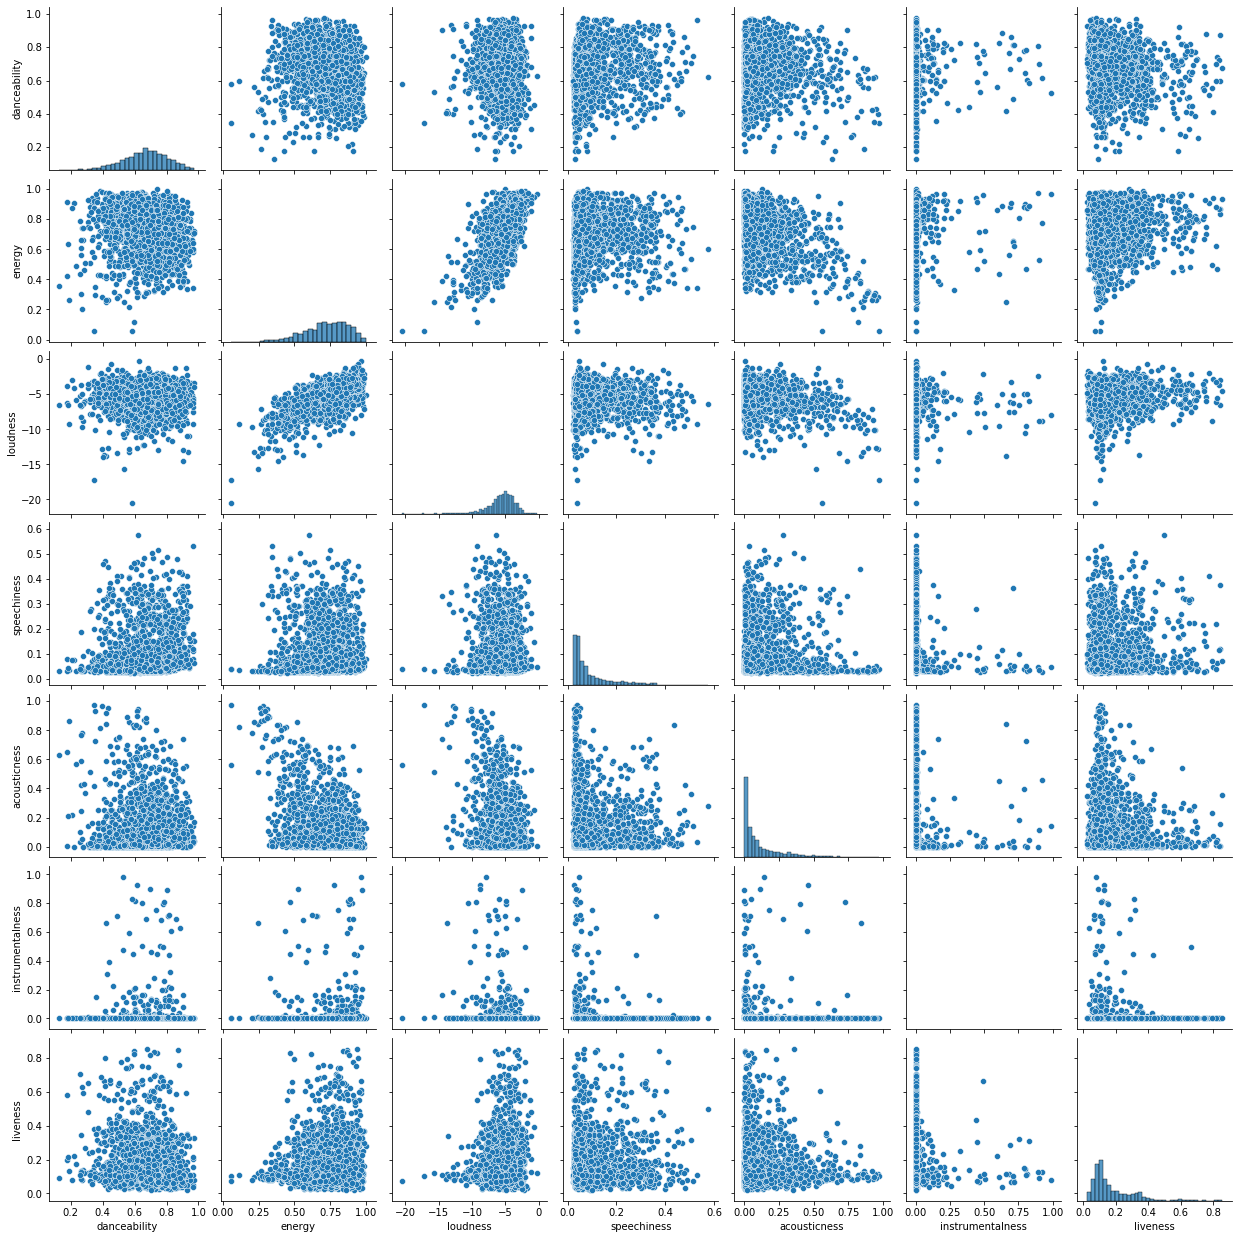

In [147]:

sns.pairplot(df_normalized[['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'popularity']])

In [12]:
df_normalized.corr()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123234,-0.312382,0.046097,-0.054085,-0.079510,-0.003635,-0.078078,-0.008680,0.072121,0.008883,-0.002440,0.027935,-0.113158,-0.038179
explicit,0.123234,1.000000,0.078352,0.043314,0.245429,-0.168784,-0.001231,-0.100663,0.056285,0.413262,-0.028249,-0.082706,0.008602,-0.044857,0.016669
year,-0.312382,0.078352,1.000000,0.003572,0.036549,-0.112849,0.006922,0.008715,-0.008041,-0.008519,0.045980,-0.053075,-0.035206,-0.215344,0.081840
popularity,0.046097,0.043314,0.003572,1.000000,0.001157,-0.015495,0.015002,0.025761,-0.020867,0.022565,0.027024,-0.045851,-0.009099,-0.012440,0.010287
danceability,-0.054085,0.245429,0.036549,0.001157,1.000000,-0.107032,0.032927,-0.034233,-0.060372,0.144054,-0.068636,0.021727,-0.129850,0.397332,-0.167369
energy,-0.079510,-0.168784,-0.112849,-0.015495,-0.107032,1.000000,-0.007335,0.656264,-0.044394,-0.063867,-0.444868,0.033336,0.150502,0.332640,0.147217
key,-0.003635,-0.001231,0.006922,0.015002,0.032927,-0.007335,1.000000,-0.010687,-0.146134,-0.003980,-0.006495,-0.001809,-0.041615,0.030870,-0.013055
loudness,-0.078078,-0.100663,0.008715,0.025761,-0.034233,0.656264,-0.010687,1.000000,-0.026241,-0.093720,-0.312422,-0.107523,0.102130,0.236218,0.079915
mode,-0.008680,0.056285,-0.008041,-0.020867,-0.060372,-0.044394,-0.146134,-0.026241,1.000000,0.002902,0.010710,-0.034790,0.019353,-0.074922,0.040362
speechiness,0.072121,0.413262,-0.008519,0.022565,0.144054,-0.063867,-0.003980,-0.093720,0.002902,1.000000,0.007303,-0.061200,0.050949,0.073977,0.064830


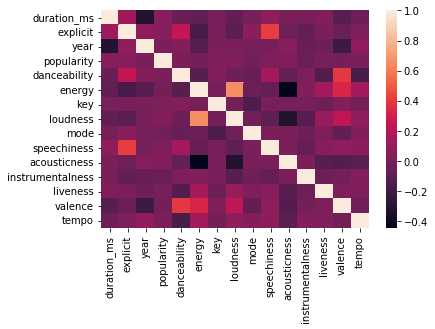

In [13]:
sns.heatmap(df_normalized.corr())

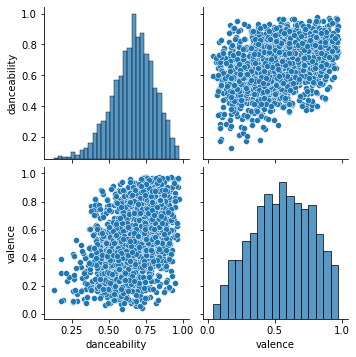

In [14]:
sns.pairplot(df_normalized[['danceability', 'valence']])

In [146]:
genre = df_normalized['genre'].value_counts()

print(genre)

pop                                      399
hip hop, pop                             263
hip hop, pop, R&B                        230
pop, Dance/Electronic                    211
pop, R&B                                 165
hip hop                                  117
hip hop, pop, Dance/Electronic            75
rock                                      56
Dance/Electronic                          40
rock, pop                                 37
rock, metal                               35
pop, latin                                26
pop, rock                                 26
latin                                     15
hip hop, Dance/Electronic                 15
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
pop, rock, metal                          12
hip hop, pop, rock                         9
country                                    9
metal                                      9
pop, Folk/

# H2: A duração média das músicas variaram ao longo do tempo?

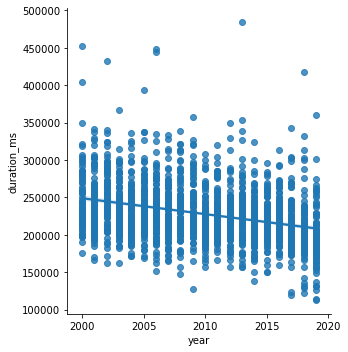

In [122]:
sns.lmplot(data = df_normalized,
          x = 'year',
          y = 'duration_ms')

# Mostra o Gráfico
plt.show()

# H3 QUAIS ARTISTAS POSSUEM MAIS CONSISTÊNCIA EM POPULARIDADE AO LONGO DO TEMPO

In [123]:
artist = df_normalized['artist'].value_counts()
print(artist)

Rihanna            23
Drake              21
Eminem             20
Calvin Harris      20
Britney Spears     18
                   ..
Gavin DeGraw        1
David Archuleta     1
Duffy               1
Kings of Leon       1
Blanco Brown        1
Name: artist, Length: 798, dtype: int64


In [124]:
top_artists = artist.head(5).index
print(top_artists)

top_genre = genre.head(5).index
print(top_genre)

Index(['Rihanna', 'Drake', 'Eminem', 'Calvin Harris', 'Britney Spears'], dtype='object')
Index(['pop', 'hip hop, pop', 'hip hop, pop, R&B', 'pop, Dance/Electronic',
       'pop, R&B'],
      dtype='object')


In [129]:
song_by_year = df_normalized.groupby(['year']).size()
song_by_year


year
2000     71
2001    106
2002     84
2003     91
2004     90
2005    100
2006     92
2007     88
2008     91
2009     80
2010    102
2011     95
2012    110
2013     85
2014     95
2015     90
2016     93
2017    110
2018    102
2019     88
dtype: int64

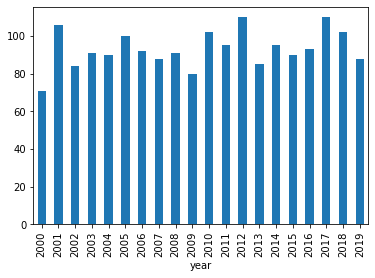

In [130]:
song_by_year.plot(kind = 'bar')

In [131]:
artist_popularity = df_normalized.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',ascending=False)
artist_popularity[:5]

,popularity
artist,
Rihanna,1662
Eminem,1452
Calvin Harris,1356
Drake,1352
David Guetta,1185


In [15]:
artist_popularity = df_normalized.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',ascending=False)
artist_popularity[:5]

,popularity
artist,
Rihanna,1662
Eminem,1452
Calvin Harris,1356
Drake,1352
David Guetta,1185


In [168]:
artist_popularity = df_normalized.groupby('artist')[['year','popularity','artist']].median().sort_values('popularity',ascending=False)
artist_popularity


,year,popularity
artist,,
Tom Odell,2013.0,88.0
The Neighbourhood,2014.0,87.0
WILLOW,2015.0,86.0
Gesaffelstein,2019.0,84.0
Lewis Capaldi,2019.0,84.0
...,...,...
Grimes,2012.0,0.0
Guy Sebastian,2012.0,0.0
AlunaGeorge,2016.0,0.0


In [133]:
df_normalized['artist']=='Tom Odell'

0       False
3       False
4       False
6       False
7       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: artist, Length: 1863, dtype: bool

In [170]:
artist_danceability = df_normalized.groupby('artist')[['artist','danceability']].median().sort_values('danceability',ascending=False)
artist_danceability

,danceability
artist,
Lil Baby,0.963
Kardinal Offishall,0.949
Lil Pump,0.936
Trick Daddy,0.933
Sak Noel,0.926
...,...
Evanescence,0.331
Travis,0.330
Faith Hill,0.321


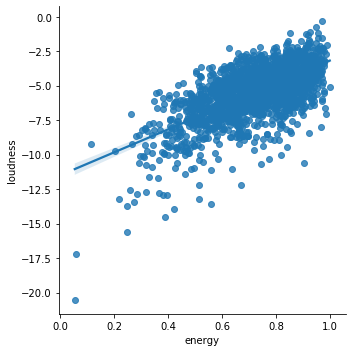

In [171]:
sns.lmplot(data=df_normalized, x='energy', y='loudness')

In [190]:
top_5_artists  = df_normalized['artist'].value_counts().head(5).index
print(top_5_artists)

list_top_5_artists = df_normalized[df_normalized['artist'].isin(top_5_artists)]
list_top_5_artists


Index(['Rihanna', 'Drake', 'Eminem', 'Calvin Harris', 'Britney Spears'], dtype='object')


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
98,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop
102,Eminem,Stan,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.0371,0.000002,0.5180,0.507,80.063,hip hop
111,Britney Spears,I'm a Slave 4 U,203600,False,2001,69,0.847,0.843,5,-3.579,0,0.1060,0.4150,0.000134,0.1070,0.963,110.027,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Drake,In My Feelings,217925,True,2018,75,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.3960,0.350,91.030,"hip hop, pop, R&B"
1886,Drake,I'm Upset,214466,True,2018,68,0.899,0.586,11,-7.866,0,0.3430,0.2790,0.000000,0.0836,0.492,150.002,"hip hop, pop, R&B"
1897,Drake,Nice For What,210746,True,2018,77,0.585,0.909,8,-6.474,1,0.0707,0.0891,0.000097,0.1190,0.758,93.372,"hip hop, pop, R&B"
1938,Drake,Money In The Grave (Drake ft. Rick Ross),205426,True,2019,76,0.831,0.502,10,-4.045,0,0.0460,0.1010,0.000000,0.1220,0.101,100.541,"hip hop, pop, R&B"


In [206]:
top_10_artists = df_normalized['artist'].value_counts().head(10).index
print(top_10_artists)

list_top_10_artists= df_normalized[df_normalized['artist'].isin(top_10_artists)]
list_top_10_artists

Index(['Rihanna', 'Drake', 'Eminem', 'Calvin Harris', 'Britney Spears',
       'David Guetta', 'Katy Perry', 'Beyoncé', 'Chris Brown', 'Kanye West'],
      dtype='object')


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
98,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop
102,Eminem,Stan,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.0371,0.000002,0.5180,0.507,80.063,hip hop
111,Britney Spears,I'm a Slave 4 U,203600,False,2001,69,0.847,0.843,5,-3.579,0,0.1060,0.4150,0.000134,0.1070,0.963,110.027,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Drake,In My Feelings,217925,True,2018,75,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.3960,0.350,91.030,"hip hop, pop, R&B"
1886,Drake,I'm Upset,214466,True,2018,68,0.899,0.586,11,-7.866,0,0.3430,0.2790,0.000000,0.0836,0.492,150.002,"hip hop, pop, R&B"
1897,Drake,Nice For What,210746,True,2018,77,0.585,0.909,8,-6.474,1,0.0707,0.0891,0.000097,0.1190,0.758,93.372,"hip hop, pop, R&B"
1938,Drake,Money In The Grave (Drake ft. Rick Ross),205426,True,2019,76,0.831,0.502,10,-4.045,0,0.0460,0.1010,0.000000,0.1220,0.101,100.541,"hip hop, pop, R&B"


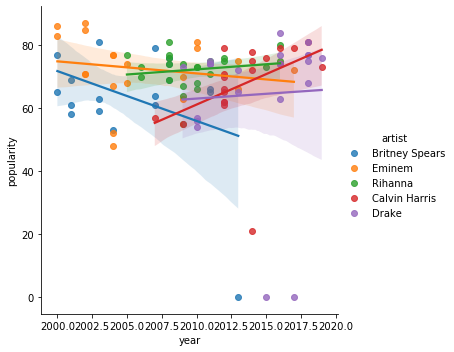

In [207]:
sns.lmplot(data=list_top_5_artists, x='year', y='popularity', hue='artist')

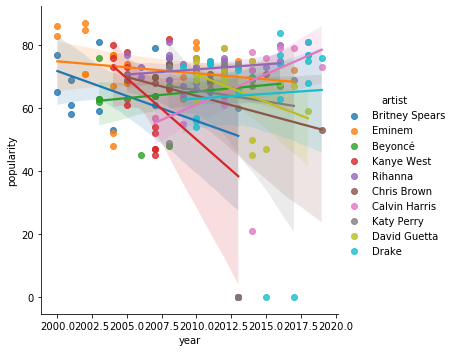

In [208]:
sns.lmplot(data=list_top_10_artists, x='year', y='popularity', hue='artist')

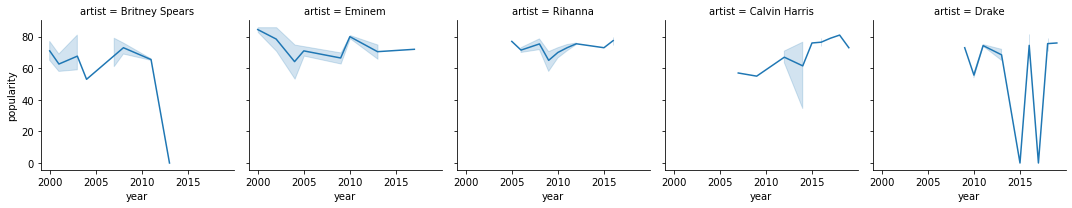

In [209]:
for i in ['popularity']:
    g = sns.FacetGrid(list_top_5_artists, col="artist")
    g.map_dataframe(sns.lineplot, x='year', y=i)

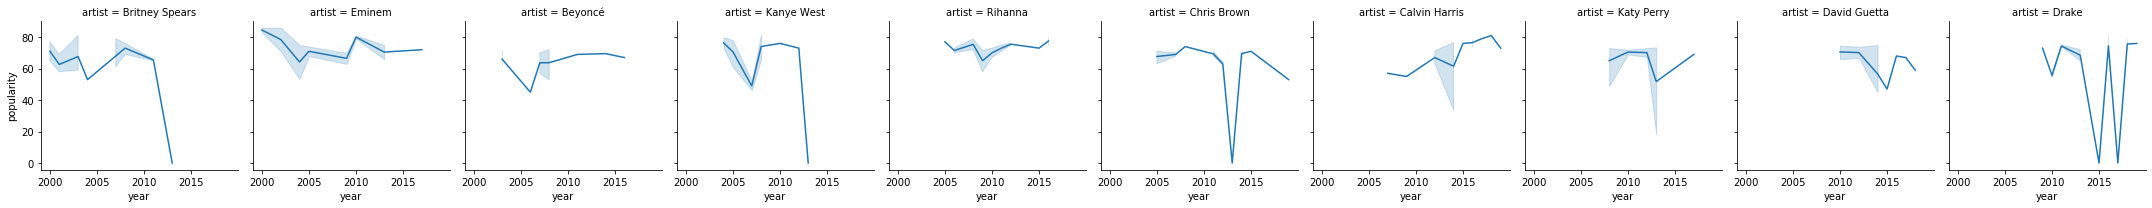

In [210]:
for i in ['popularity']:
    g = sns.FacetGrid(list_top_10_artists, col="artist")
    g.map_dataframe(sns.lineplot, x='year', y=i)

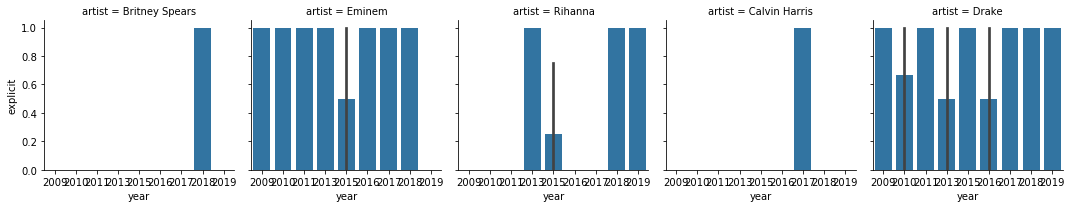

In [211]:
for i in ['explicit']:
    g = sns.FacetGrid(list_top_5_artists, col="artist")
    g.map_dataframe(sns.barplot, x='year', y=i)

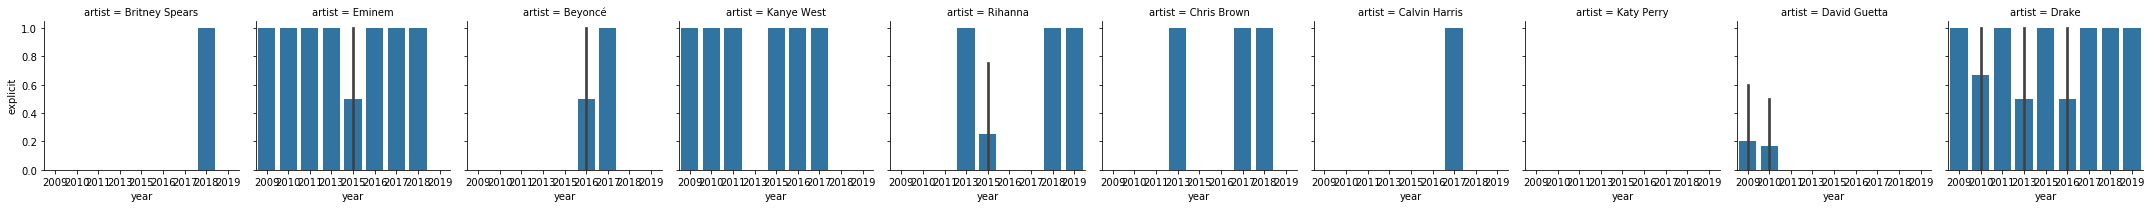

In [204]:
for i in ['explicit']:
    g = sns.FacetGrid(list_top_10_artists, col="artist")
    g.map_dataframe(sns.barplot, x='year', y=i)

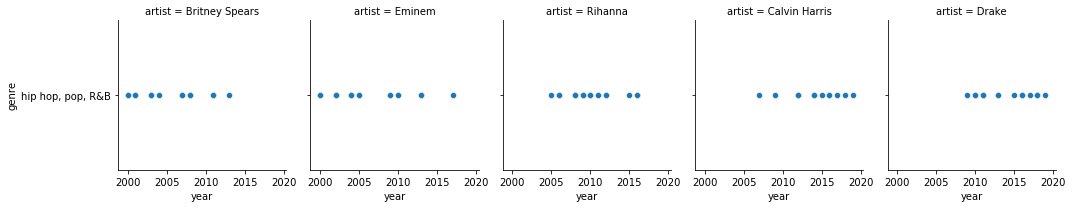

In [212]:
for i in ['genre']:
    g = sns.FacetGrid(list_top_5_artists, col="artist")
    g.map_dataframe(sns.scatterplot, x='year', y=i)

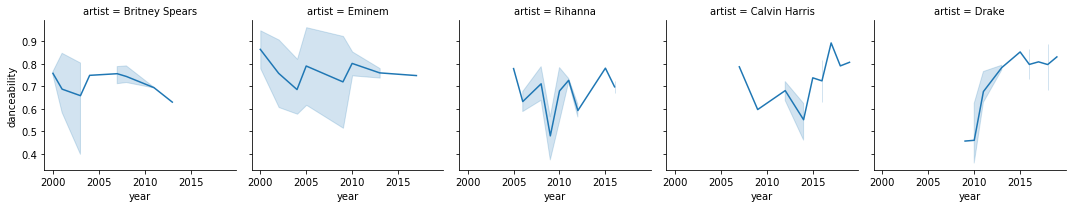

In [213]:
for i in ['danceability']:
    g = sns.FacetGrid(list_top_5_artists, col="artist")
    g.map_dataframe(sns.lineplot, x='year', y=i)

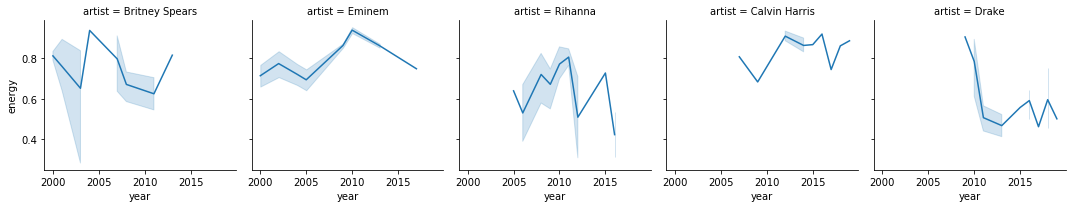

In [214]:
for i in ['energy']:
    g = sns.FacetGrid(list_top_5_artists, col="artist")
    g.map_dataframe(sns.lineplot, x='year', y=i)

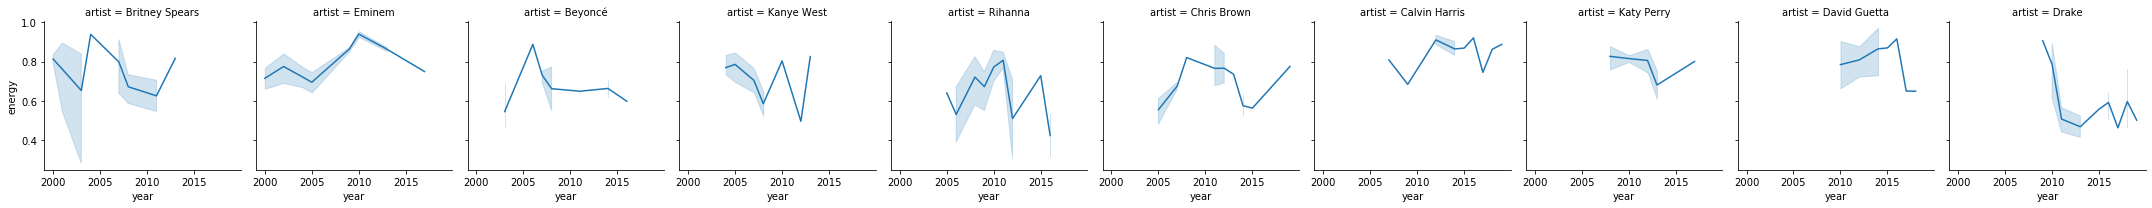

In [216]:
for i in ['energy']:
    g = sns.FacetGrid(list_top_10_artists, col="artist")
    g.map_dataframe(sns.lineplot, x='year', y=i)